In [20]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
import missingno as msno
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings('always')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
plt.style.use("bmh")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.decomposition import PCA


#classifiaction.
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC,SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn import metrics

In [21]:
train = pd.read_csv('train.csv')
df=train.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [22]:
df = df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [23]:
df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
df['Date']= pd.to_datetime(df['Date'])
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['DoW'] = df.Date.dt.dayofweek
df['week'] = df.Date.dt.week
# df['Day_of_Week_name'] = df.Date.dt.day_name()
# df['Week_of_year'] = df.Date.dt.weekofyear

df.set_index("Date",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2017-01-12 to 2018-11-20
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5760 non-null   int64  
 1   y                      5760 non-null   int64  
 2   Hour                   5760 non-null   int64  
 3   Temperature            5760 non-null   float64
 4   Humidity               5760 non-null   int64  
 5   Wind_speed             5760 non-null   float64
 6   Visibility             5760 non-null   int64  
 7   Dew_point_temperature  5760 non-null   float64
 8   Solar_Radiation        5760 non-null   float64
 9   Rainfall               5760 non-null   float64
 10  Snowfall               5760 non-null   float64
 11  Seasons                5760 non-null   object 
 12  Holiday                5760 non-null   object 
 13  Functioning_Day        5760 non-null   object 
 14  Day                    5760 non-null  

<AxesSubplot:xlabel='Day', ylabel='y'>

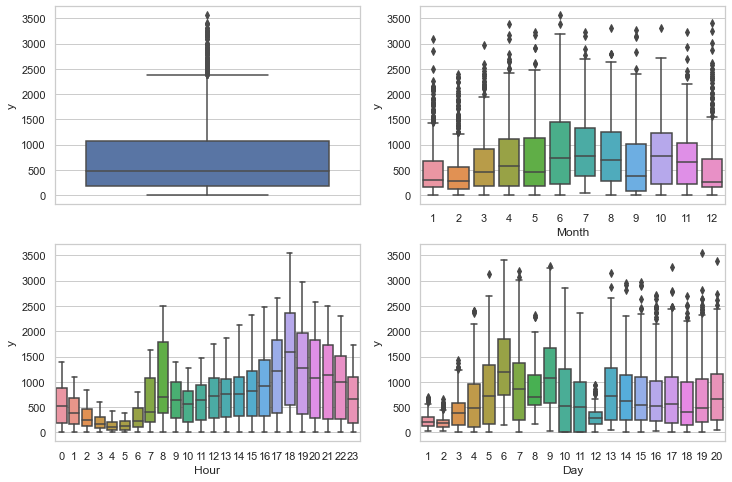

In [25]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 8)

sns.boxplot(data=df, y='y', ax=ax1)
sns.boxplot(data=df, x='Month', y='y', ax=ax2)
sns.boxplot(data=df, x='Hour', y='y', ax=ax3)
sns.boxplot(data=df, x='Day', y='y', ax=ax4)

<AxesSubplot:xlabel='Hour', ylabel='y'>

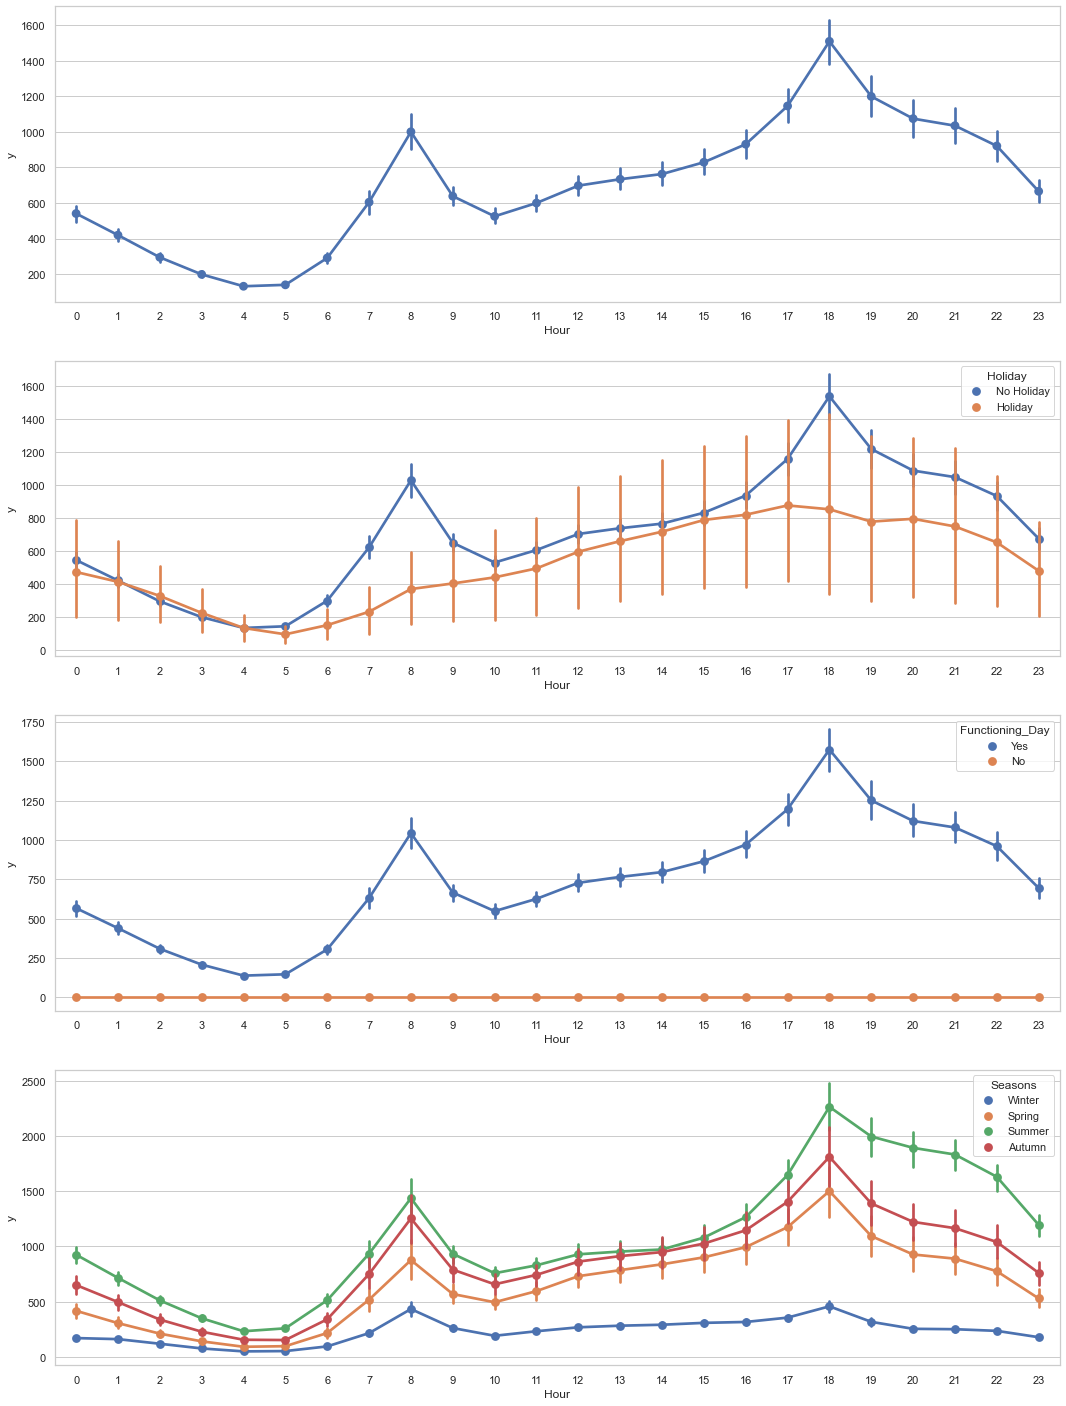

In [27]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18,25)

sns.pointplot(data=df, x='Hour', y='y', ax=ax1)
sns.pointplot(data=df, x='Hour', y='y', hue='Holiday', ax=ax2)
sns.pointplot(data=df, x='Hour', y='y', hue='Functioning_Day', ax=ax3)
sns.pointplot(data=df, x='Hour', y='y', hue='Seasons', ax=ax4)

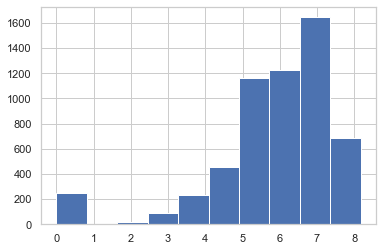

In [28]:
y_log = np.log1p(df.y)
plt.hist(y_log);

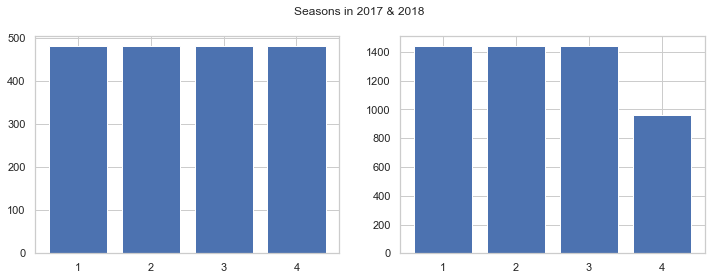

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['1', '2', '3', '4']

values = df['Seasons'][df['Year'] == 2017].value_counts()
ax[0].bar(names, values)

values = df['Seasons'][df['Year'] == 2018].value_counts()
ax[1].bar(names, values)

fig.suptitle('Seasons in 2017 & 2018');

In [35]:
# df.Seasons.replace(['Autumn' ,'Winter', 'Spring' ,'Summer'],[3,4,1,2],inplace=True)

In [37]:
# spring_2011 = int(df['Seasons'][df['Seasons'] == 1][df['Year'] == 2017].value_counts())
# summer_2011 = int(df['Seasons'][df['Seasons'] == 2][df['Year'] == 2017].value_counts())
# fall_2011 = int(df['Seasons'][df['Seasons'] == 3][df['Year'] == 2017].value_counts())
# winter_2011 = int(df['Seasons'][df['Seasons'] == 4][df['Year'] == 2017].value_counts())

# spring_2012 = int(df['Seasons'][df['Seasons'] == 1][df['Year'] == 2018].value_counts())
# summer_2012 = int(df['Seasons'][df['Seasons'] == 2][df['Year'] == 2018].value_counts())
# fall_2012 = int(df['Seasons'][df['Seasons'] == 3][df['Year'] == 2018].value_counts())
# winter_2012 =int(df['Seasons'][df['Seasons'] == 4][df['Year'] == 2018].value_counts())

# print("Spring 2011: {}".format(spring_2011))
# print("Summer 2011: {}".format(summer_2011))
# print("Fall 2011: {}".format(fall_2011))
# print("Winter 2011: {}".format(winter_2011))
# print("-----------------------------------------")
# print("Spring 2012: {}".format(spring_2012))
# print("Summer 2012: {}".format(summer_2012))
# print("Fall 2012: {}".format(fall_2012))
# print("Winter 2012: {}".format(winter_2012))

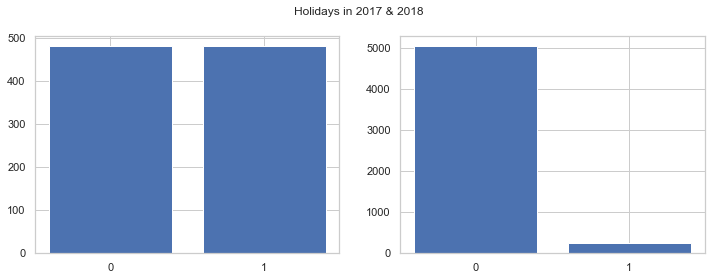

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['Holiday'][df['Year'] == 2017].value_counts()
ax[0].bar(names, values)

values = df['Holiday'][df['Year'] == 2018].value_counts()
ax[1].bar(names, values)

fig.suptitle('Holidays in 2017 & 2018');

In [40]:
df.Holiday.value_counts()

No Holiday    5520
Holiday        240
Name: Holiday, dtype: int64

In [45]:
# no_holiday_2011 = int(df['Holiday'][df['Holiday'] == 'No Holiday'][df['Year'] == 2017].value_counts())
# holiday_2011 = int(df['Holiday'][df['Holiday'] == 'Holiday'][df['Year'] == 2017].value_counts())
# no_holiday_2012 = int(df['Holiday'][df['Holiday'] == 'No Holiday'][df['Year'] == 2018].value_counts())
# holiday_2012 = int(df['Holiday'][df['Holiday'] == 'Holiday'][df['Year'] == 2018].value_counts())

# print("No Holidays 2011: {}".format(no_holiday_2011))
# print("No Holidays 2012: {}".format(no_holiday_2012))
# print("Holidays 2011: {}".format(holiday_2011))
# print("Holidays 2012: {}".format(holiday_2012))
# print('----------------')
# total_2011 = no_holiday_2011 + holiday_2011
# total_2012 = no_holiday_2012 + holiday_2012
# print('No Holidays 2011: {:.0f}%'.format(no_holiday_2011 / total_2011 * 100))
# print('No Holidays 2012: {:.0f}%'.format(no_holiday_2012 / total_2012 * 100))


In [6]:
print(df.nunique())

ID                       5760
Date                      240
y                        1890
Hour                       24
Temperature               515
Humidity                   86
Wind_speed                 63
Visibility               1584
Dew_point_temperature     516
Solar_Radiation           340
Rainfall                   45
Snowfall                   36
Seasons                     4
Holiday                     2
Functioning_Day             2
Day                        20
Month                      12
Year                        2
dtype: int64


In [7]:
from numpy import unique

data = df.to_numpy().astype(str)
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    print('%s, %d, %.1f%%' % (df.columns[i], num, percentage))

ID, 5760, 100.0%
Date, 240, 4.2%
y, 1890, 32.8%
Hour, 24, 0.4%
Temperature, 515, 8.9%
Humidity, 86, 1.5%
Wind_speed, 63, 1.1%
Visibility, 1584, 27.5%
Dew_point_temperature, 516, 9.0%
Solar_Radiation, 340, 5.9%
Rainfall, 45, 0.8%
Snowfall, 36, 0.6%
Seasons, 4, 0.1%
Holiday, 2, 0.0%
Functioning_Day, 2, 0.0%
Day, 20, 0.3%
Month, 12, 0.2%
Year, 2, 0.0%


In [8]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Mean #####################")
    print(dataframe.mean(axis=0))
    print("##################### Std #####################")
    print(dataframe.std(axis=0))

In [9]:
check_df(df)

##################### Shape #####################
(5760, 18)
##################### Types #####################
ID                                int64
Date                     datetime64[ns]
y                                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind_speed                      float64
Visibility                        int64
Dew_point_temperature           float64
Solar_Radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                          object
Holiday                          object
Functioning_Day                  object
Day                               int64
Month                             int64
Year                              int64
dtype: object
##################### Head #####################
   ID       Date    y  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0   0 2017-01-12  254     0 

In [10]:
# msno.matrix(df)

In [11]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])
# delete duplicate rows
# df.drop_duplicates(inplace=True)
# # We have to reset indexes because our dataframe still having previous indexes after dropping rows
# df=df.reset_index(drop=True)

False
Empty DataFrame
Columns: [ID, Date, y, Hour, Temperature, Humidity, Wind_speed, Visibility, Dew_point_temperature, Solar_Radiation, Rainfall, Snowfall, Seasons, Holiday, Functioning_Day, Day, Month, Year]
Index: []


In [12]:
# Check for any missing values
print(df.isnull().values.any())
# This gives - True#Getting the summary of what are missing value columns
df.isnull().sum()

False


ID                       0
Date                     0
y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
dtype: int64

In [13]:
numerical_only = ['Temperature', 'Humidity', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Hour',
                  'Solar_Radiation', 'Rainfall','Snowfall', 'Day', 'Month','Year']

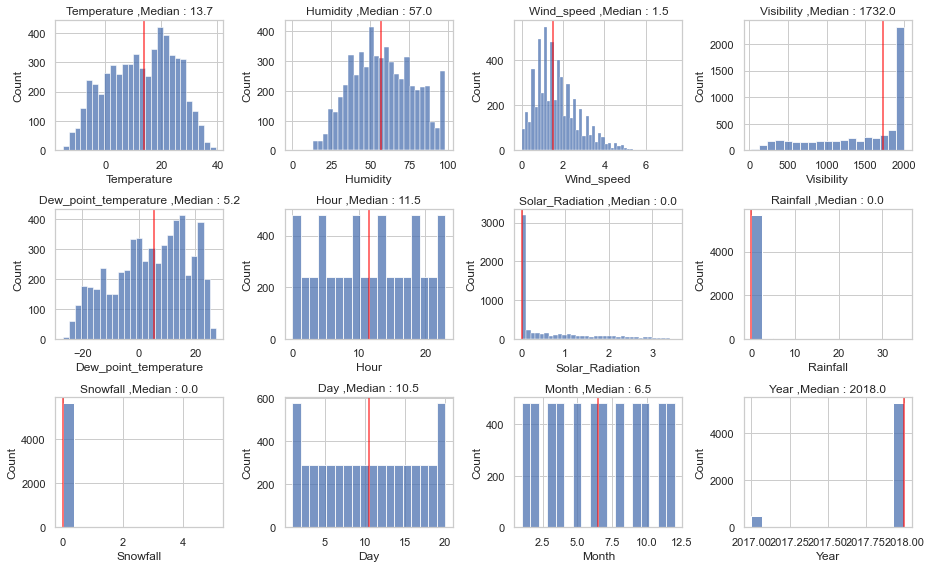

In [14]:
fig,axes = plt.subplots(3,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.histplot(df[numerical_only[i]],ax=axe)
    median = df[numerical_only[i]].median()
    axe.set_title(numerical_only[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red',lw=2, alpha = 0.55)
plt.tight_layout()
plt.show()

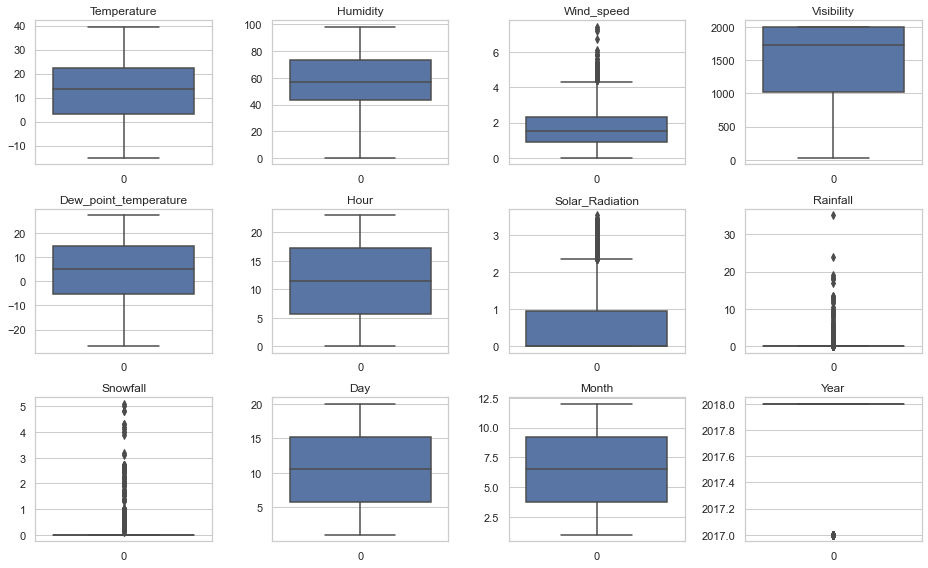

In [15]:
fig,axes = plt.subplots(3,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.boxplot(data=df[numerical_only[i]],ax=axe)
    axe.set_title(numerical_only[i])
    
plt.tight_layout()
plt.show()

In [17]:
f=['y', 'Hour', 'Temperature', 'Humidity', 'Wind_speed','Visibility', 
   'Dew_point_temperature', 'Solar_Radiation', 'Rainfall','Snowfall']

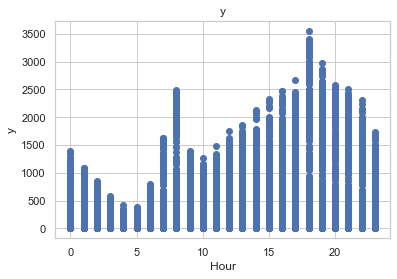

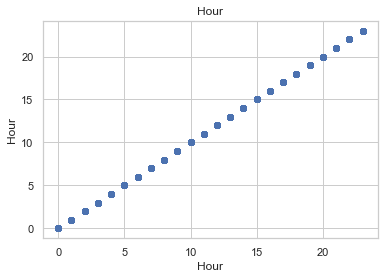

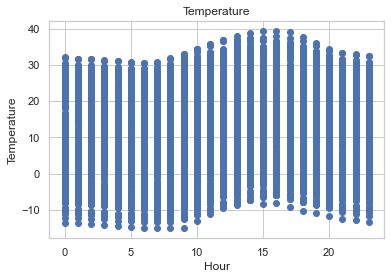

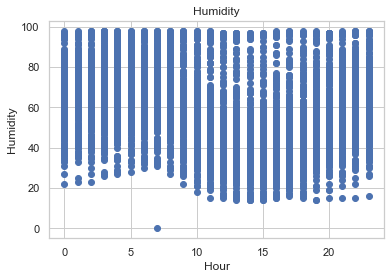

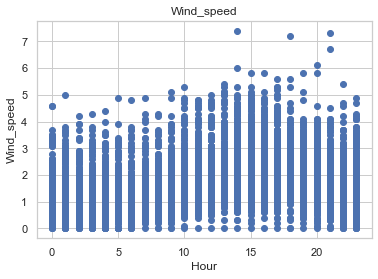

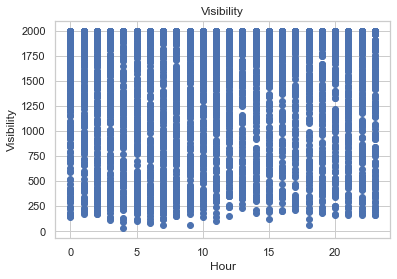

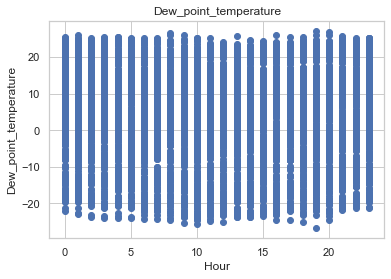

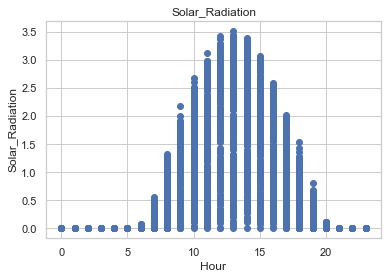

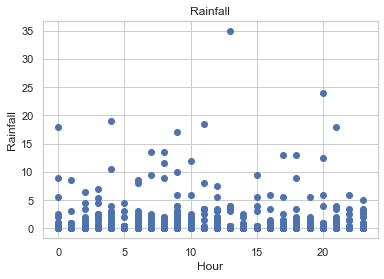

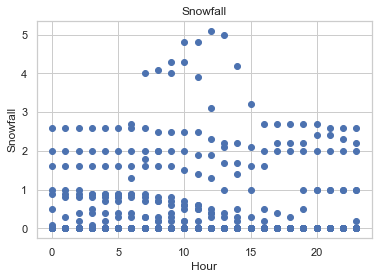

In [18]:
for i in f:
    
    plt.scatter(x = 'Hour', y = i, data = df)
    # Create title, xlabel and ylabel
    plt.title(i)
    plt.xlabel('Hour')
    plt.ylabel(i)
    # Show plot
    plt.show()


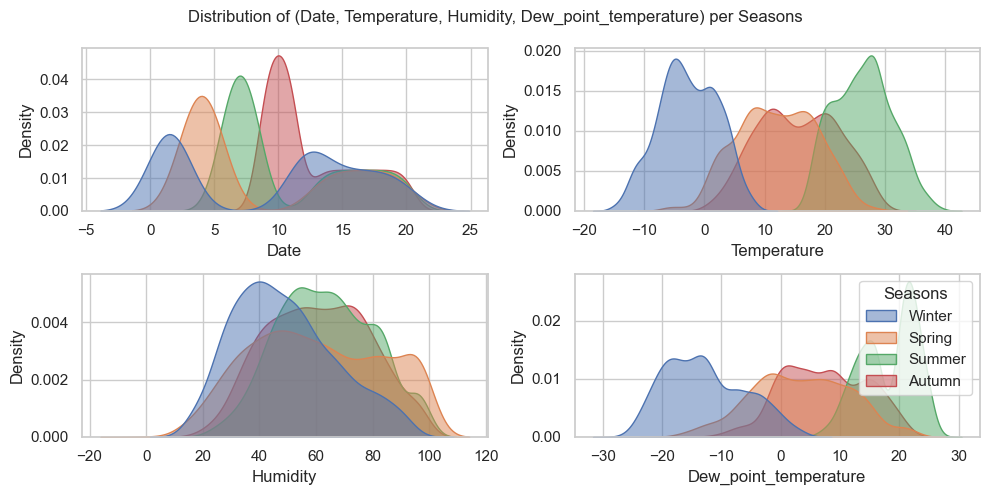

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (Date, Temperature, Humidity, Dew_point_temperature) per Seasons')

# Distribution of sepal length per Species
sns.kdeplot(ax = axes[0,0], data = df, x = 'Day', hue = "Seasons", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("Date")
axes[0,0].get_legend().remove()

# Distribution of sepal width per Species
sns.kdeplot(ax = axes[0,1], data = df, x = 'Temperature', hue = "Seasons", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("Temperature")
axes[0,1].get_legend().remove()

# Distribution of petal length per Species
sns.kdeplot(ax = axes[1,0], data = df, x = 'Humidity', hue = "Seasons", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("Humidity")
axes[1,0].get_legend().remove()

# Distribution of petal width per Species
sns.kdeplot(ax = axes[1,1], data = df, x = 'Dew_point_temperature', hue = "Seasons", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("Dew_point_temperature")

plt.tight_layout()

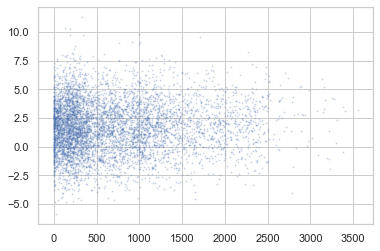

In [20]:
age = df.y + np.random.normal(0, 0.5, size=len(df))
weight = df.Wind_speed + np.random.normal(0, 2, size=len(df))
plt.plot(age, weight,'o', markersize=1, alpha=0.2)
plt.show()


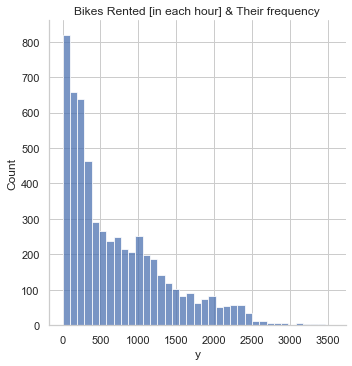

In [21]:
sns.displot(data=df['y'])
plt.title("Bikes Rented [in each hour] & Their frequency")
plt.show()

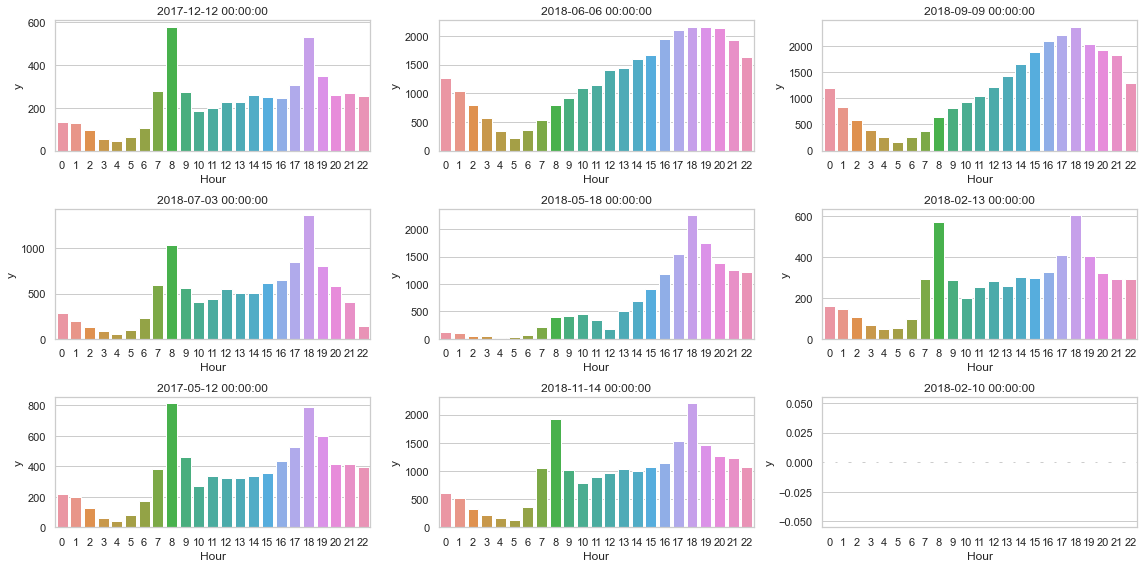

In [22]:
selection_set = [x for x in range(0,len(df),24)]
fig , axes = plt.subplots(3,3,figsize=(16,8))
for ax in axes.flatten():  
    i = np.random.choice(selection_set)
    sns.barplot(data=df.iloc[i:i+23,:],x='Hour',y='y',ax=ax)
    ax.set_title(str(df.loc[i,'Date']))
plt.tight_layout()
plt.show()  

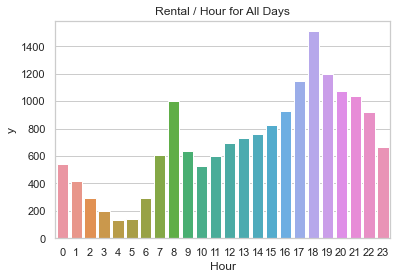

In [23]:
df_hours = df.groupby('Hour',as_index =False)[['y']].mean()
sns.barplot(data=df_hours,x='Hour',y='y')
plt.title(str('Rental / Hour for All Days'))
plt.show()

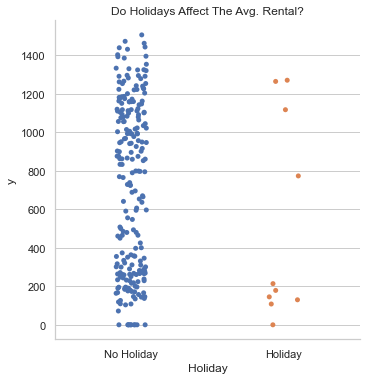

In [24]:
df_cat_day_y = df.groupby(['Date','Holiday','Functioning_Day'],as_index =False)['y'].mean()
sns.catplot(data= df_cat_day_y,x='Holiday',y="y")
plt.title(str('Do Holidays Affect The Avg. Rental?'))
plt.show()

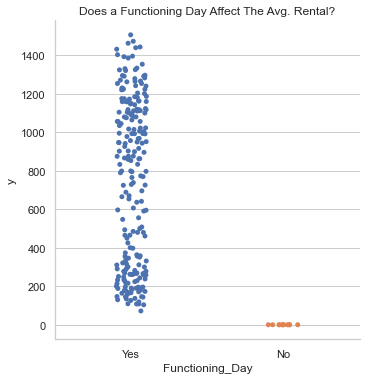

In [25]:
sns.catplot(data= df_cat_day_y,x='Functioning_Day',y="y")
plt.title(str('Does a Functioning Day Affect The Avg. Rental?'))
plt.show()

In [26]:
df_cat_day_y['Functioning_Day'].value_counts()

Yes    230
No      11
Name: Functioning_Day, dtype: int64

In [27]:
df_cat_day_y.loc[:,['Holiday','Functioning_Day']].value_counts()


Holiday     Functioning_Day
No Holiday  Yes                221
            No                  10
Holiday     Yes                  9
            No                   1
dtype: int64

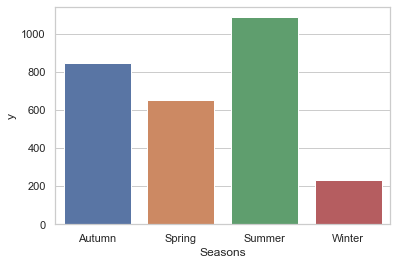

In [28]:
df_seasons_y = df.groupby(['Seasons'],as_index =False)['y'].mean()
sns.barplot(data = df_seasons_y,x='Seasons',y='y')
plt.show()

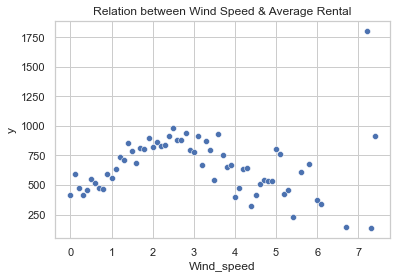

In [29]:
windspeed_rental = df.groupby('Wind_speed',as_index=False)['y'].mean()
sns.scatterplot(data = windspeed_rental,x='Wind_speed',y='y')
plt.title("Relation between Wind Speed & Average Rental")
plt.show()

# Conditional Transformation

In [30]:
windspeed_rental["Wind_speed_ap"] = pd.Series(np.where(windspeed_rental.Wind_speed < 2.7, "increase", "decrease"))

In [31]:
windspeed_rental.head()

,Wind_speed,y,Wind_speed_ap
0,0.0,412.435484,increase
1,0.1,592.272727,increase
2,0.2,475.311475,increase
3,0.3,419.366071,increase
4,0.4,456.826772,increase


In [32]:
windspeed_rental.Wind_speed_ap.value_counts()

decrease    36
increase    27
Name: Wind_speed_ap, dtype: int64

In [33]:
df.Wind_speed.value_counts().sort_index().head(40)

0.0     62
0.1     33
0.2     61
0.3    112
0.4    127
0.5    163
0.6    200
0.7    192
0.8    250
0.9    246
1.0    255
1.1    274
1.2    276
1.3    221
1.4    238
1.5    243
1.6    222
1.7    211
1.8    193
1.9    139
2.0    189
2.1    154
2.2    150
2.3    146
2.4    142
2.5    110
2.6    118
2.7     90
2.8     97
2.9     89
3.0     65
3.1     81
3.2     73
3.3     67
3.4     55
3.5     53
3.6     39
3.7     48
3.8     30
3.9     32
Name: Wind_speed, dtype: int64

In [34]:
df["Wind_speed_ap"] = pd.Series(np.where(df.Wind_speed < 2.7, "Wind_increase", "Wind_decrease"))
df.Wind_speed_ap.value_counts()

Wind_increase    4727
Wind_decrease    1033
Name: Wind_speed_ap, dtype: int64

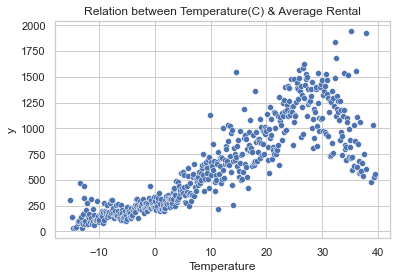

In [35]:
temperature_rental = df.groupby('Temperature',as_index=False)['y'].mean()
sns.scatterplot(data = temperature_rental,x='Temperature',y='y')
plt.title("Relation between Temperature(C) & Average Rental")
plt.show()

In [36]:
temperature_rental["Temperature_ap"] = pd.Series(np.where(temperature_rental.Temperature < 27, "increase", "decrease"))

In [37]:
temperature_rental.head()

,Temperature,y,Temperature_ap
0,-15.1,304.0,increase
1,-14.9,144.0,increase
2,-14.6,35.0,increase
3,-14.3,30.0,increase
4,-14.1,42.0,increase


In [38]:
temperature_rental.Temperature_ap.value_counts()

increase    409
decrease    106
Name: Temperature_ap, dtype: int64

In [39]:
df.Temperature.value_counts().sort_index().head()

-15.1    2
-14.9    2
-14.6    1
-14.3    1
-14.1    1
Name: Temperature, dtype: int64

In [40]:
# df["Temperature_ap"] = pd.Series(np.where(df.Temperature < 27, "Temp_increase", "Temp_decrease"))
# df.Temperature_ap.value_counts()

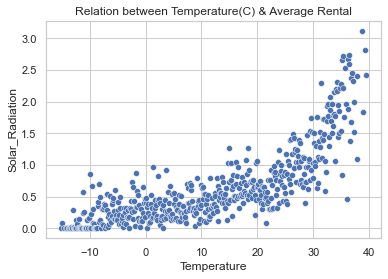

In [41]:
temperature_rental = df.groupby('Temperature',as_index=False)['Solar_Radiation'].mean()
sns.scatterplot(data = temperature_rental,x='Temperature',y='Solar_Radiation')
plt.title("Relation between Temperature(C) & Average Rental")
plt.show()

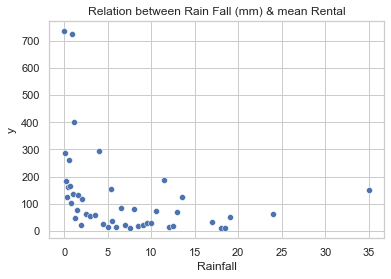

In [42]:
rain_fall_rental = df.groupby(['Rainfall'],as_index=False)['y'].mean()
sns.scatterplot(data = rain_fall_rental,x='Rainfall',y='y')
plt.title("Relation between Rain Fall (mm) & mean Rental")
plt.show()

# Discretization and Binning 

In [43]:
Rainfall_bins = [0, 10, 20, 36]
cats = pd.cut(rain_fall_rental.Rainfall, Rainfall_bins, right = False)

In [44]:
cats.value_counts()

[0, 10)     32
[10, 20)    11
[20, 36)     2
Name: Rainfall, dtype: int64

In [45]:
rain_fall_rental["Rainfall_cat"] = cats
rain_fall_rental.head()

,Rainfall,y,Rainfall_cat
0,0.0,736.652174,"[0, 10)"
1,0.1,288.423077,"[0, 10)"
2,0.2,183.000000,"[0, 10)"
3,0.3,124.285714,"[0, 10)"
4,0.4,160.818182,"[0, 10)"


In [46]:
rain_fall_rental.groupby("Rainfall_cat").y.mean()

Rainfall_cat
[0, 10)     145.458385
[10, 20)     55.681818
[20, 36)    106.000000
Name: y, dtype: float64

In [47]:
group_names = ["Rainy", "lightRain", "no_Rain"]
rain_fall_rental["Rainfall_cat"] = pd.cut(rain_fall_rental.Rainfall, Rainfall_bins, right = False, labels = group_names)
rain_fall_rental.head(10)

,Rainfall,y,Rainfall_cat
0,0.0,736.652174,Rainy
1,0.1,288.423077,Rainy
2,0.2,183.000000,Rainy
3,0.3,124.285714,Rainy
4,0.4,160.818182,Rainy
5,0.5,259.582278,Rainy
6,0.7,165.000000,Rainy
7,0.8,102.500000,Rainy
8,0.9,723.500000,Rainy
9,1.0,135.534884,Rainy


In [48]:
rain_fall_rental.groupby("Rainfall_cat").y.mean()

Rainfall_cat
Rainy        145.458385
lightRain     55.681818
no_Rain      106.000000
Name: y, dtype: float64

In [49]:
Rainfall_labels =["Rainy", "lightRain", "no_Rain"]

In [50]:
rain_fall_rental["Rainfall_cat"] =  pd.qcut(rain_fall_rental.Rainfall, [0, 0.1,0.3, 1], precision = 0, labels = Rainfall_labels) 

In [51]:
rain_fall_rental.groupby("Rainfall_cat").y.mean()

Rainfall_cat
Rainy        298.635829
lightRain    226.757343
no_Rain       62.747519
Name: y, dtype: float64

In [52]:
# Rainfall_labels =["Rainy", "lightRain", "no_Rain"]
# df["Rainfall_cat"] = pd.qcut(df.Rainfall, [0, 0.2,0.4, 1],precision = 0,labels = Rainfall_labels,duplicates='drop')
df.Rainfall.value_counts().sort_index().head(50)

In [54]:
df.Rainfall.unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        0.9,  2. ,  9. ,  1.5,  8. , 17. ,  3.5,  7. ,  3. ,  1.9,  0.8,
        4. , 35. , 19. , 13.5, 10. , 12.5,  6. , 11.5,  5.4, 10.5, 12. ,
       18.5,  7.5,  5.5,  5. ,  4.5, 24. ,  8.5,  6.5, 13. ,  1.2,  9.5,
       18. ])

In [55]:
group_names = ["Rainy", "lightRain", "no_Rain"]
Rainfall_bins = [0, 10, 18, 36]
df["Rainfall_cat"] = pd.cut(df.Rainfall, Rainfall_bins, right = False, labels = group_names)

In [56]:
df.Rainfall_cat.value_counts()

Rainy        5744
lightRain      10
no_Rain         6
Name: Rainfall_cat, dtype: int64

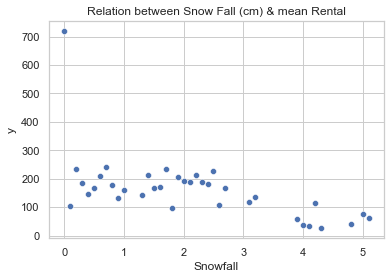

In [57]:
snow_fall_rental = df.groupby(['Snowfall'],as_index=False)['y'].mean()
sns.scatterplot(data = snow_fall_rental,x='Snowfall',y='y')
plt.title("Relation between Snow Fall (cm) & mean Rental")
plt.show()

In [58]:
snow_fall_rental["Snowfall_ap"] = pd.Series(np.where(snow_fall_rental.Snowfall < 3.5, "Snowfall", "no_Snowfall"))

In [59]:
snow_fall_rental.head()

,Snowfall,y,Snowfall_ap
0,0.0,720.744086,Snowfall
1,0.1,102.500000,Snowfall
2,0.2,233.545455,Snowfall
3,0.3,184.000000,Snowfall
4,0.4,145.300000,Snowfall


In [60]:
snow_fall_rental.Snowfall_ap.value_counts()

Snowfall       28
no_Snowfall     8
Name: Snowfall_ap, dtype: int64

In [61]:
df["Snowfall_ap"] = pd.Series(np.where(df.Snowfall < 2, "Snowfall", "no_Snowfall"))
df.Snowfall_ap.value_counts()

Snowfall       5694
no_Snowfall      66
Name: Snowfall_ap, dtype: int64

In [62]:
df.Snowfall.unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.5])

In [63]:
df.Snowfall.value_counts().sort_index().head(50)

0.0    5580
0.1       2
0.2      11
0.3      12
0.4      10
0.5       9
0.6       5
0.7       7
0.8      10
0.9      12
1.0      14
1.3       2
1.4       2
1.5       1
1.6      12
1.7       2
1.8       1
1.9       2
2.0      20
2.1       2
2.2       6
2.3       2
2.4       2
2.5       4
2.6      11
2.7       6
3.1       1
3.2       1
3.9       1
4.0       2
4.1       1
4.2       1
4.3       2
4.8       2
5.0       1
5.1       1
Name: Snowfall, dtype: int64

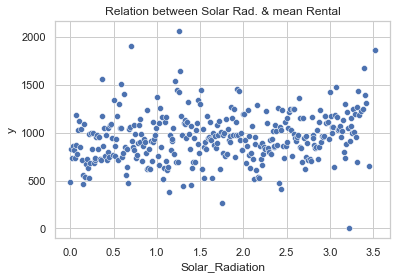

In [64]:
solar_rental = df.groupby(['Solar_Radiation'],as_index=False)['y'].mean()
sns.scatterplot(data = solar_rental,x='Solar_Radiation',y='y')
plt.title("Relation between Solar Rad. & mean Rental")
plt.show()

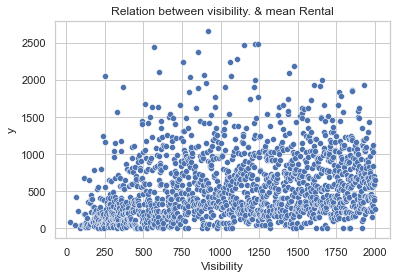

In [65]:
visibility_rental = df.groupby(['Visibility'],as_index=False)['y'].median()
sns.scatterplot(data = visibility_rental,x='Visibility',y='y')
plt.title("Relation between visibility. & mean Rental")
plt.show()

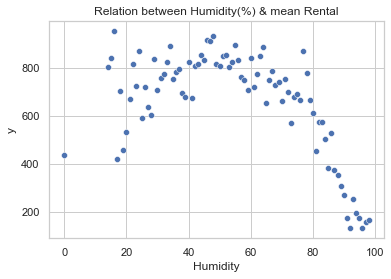

In [66]:
Humidity_rental = df.groupby(['Humidity'],as_index=False)['y'].mean()
sns.scatterplot(data = Humidity_rental,x='Humidity',y='y')
plt.title("Relation between Humidity(%) & mean Rental")
plt.show()

# Conditional Transformation

In [67]:
Humidity_rental["Humidity_ap"] = pd.Series(np.where(Humidity_rental.Humidity < 50, "increase", "decrease"))

In [68]:
Humidity_rental.head()

,Humidity,y,Humidity_ap
0,0,436.000000,increase
1,14,804.000000,increase
2,15,840.846154,increase
3,16,955.000000,increase
4,17,421.333333,increase


In [69]:
Humidity_rental.Humidity_ap.value_counts()

decrease    49
increase    37
Name: Humidity_ap, dtype: int64

In [70]:
# df["Humidity_ap"] = pd.Series(np.where(df.Humidity < 58, "Hum_increase", "Hum_decrease"))
# df.Humidity_ap.value_counts()

In [71]:
df.Humidity.value_counts().sort_index().tail(50)

49    109
50     90
51    113
52    104
53    116
54    102
55    100
56    114
57    107
58     88
59     92
60     91
61     78
62     88
63     99
64    100
65     99
66     89
67     84
68     83
69     87
70     81
71     73
72     85
73     89
74     70
75     69
76     76
77     68
78     72
79     56
80     66
81     81
82     73
83     72
84     67
85     71
86     55
87     48
88     44
89     44
90     30
91     21
92     18
93     25
94     33
95     36
96     65
97    123
98     43
Name: Humidity, dtype: int64

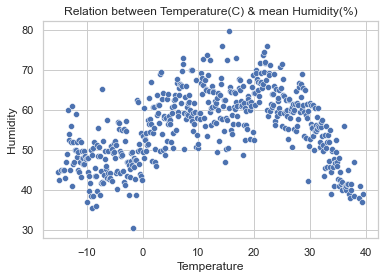

In [72]:
Temp_Hum_rental = df.groupby(['Temperature'],as_index=False)['Humidity'].mean()
sns.scatterplot(data = Temp_Hum_rental,x='Temperature',y='Humidity')
plt.title("Relation between Temperature(C) & mean Humidity(%)")
plt.show()

In [73]:
Temp_Hum_rental["Temp_Hum_rental_ap"] = pd.Series(np.where(Temp_Hum_rental.Temperature < 20, "increase", "decrease"))
Temp_Hum_rental.head()

,Temperature,Humidity,Temp_Hum_rental_ap
0,-15.1,44.5,increase
1,-14.9,42.5,increase
2,-14.6,45.0,increase
3,-14.3,45.0,increase
4,-14.1,45.0,increase


In [74]:
Temp_Hum_rental.Temp_Hum_rental_ap.value_counts()

increase    339
decrease    176
Name: Temp_Hum_rental_ap, dtype: int64

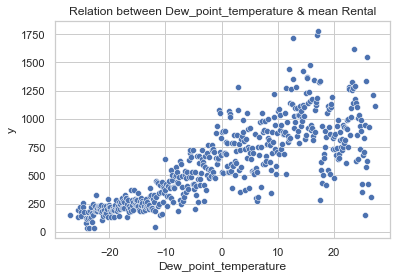

In [75]:
Dew_point_rental = df.groupby(['Dew_point_temperature'],as_index=False)['y'].mean()
sns.scatterplot(data = Dew_point_rental,x='Dew_point_temperature',y='y')
plt.title("Relation between Dew_point_temperature & mean Rental")
plt.show()

In [76]:
Dew_point_rental["Dew_point_temperature_ap"] = pd.Series(np.where(Dew_point_rental.Dew_point_temperature < 18, "increase", "decrease"))
Dew_point_rental.Dew_point_temperature_ap.value_counts()

increase    431
decrease     85
Name: Dew_point_temperature_ap, dtype: int64

In [77]:
# df["Dew_point_temperature_ap"] = pd.Series(np.where(df.Dew_point_temperature < 18, "Dew_increase", "Dew_decrease"))
# df.Dew_point_temperature_ap.value_counts()

In [78]:
df.Dew_point_temperature.value_counts().sort_index().head()

-26.9    1
-25.6    1
-25.5    1
-25.2    1
-25.1    1
Name: Dew_point_temperature, dtype: int64

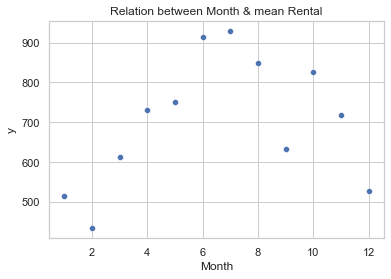

In [79]:
Month_rental = df.groupby(['Month'],as_index=False)['y'].mean()
sns.scatterplot(data = Month_rental,x='Month',y='y')
plt.title("Relation between Month & mean Rental")
plt.show()

In [80]:
Month_rental["Month_ap"] = pd.Series(np.where(Month_rental.Month < 8, "increase", "decrease"))
Month_rental.Month_ap.value_counts()

increase    7
decrease    5
Name: Month_ap, dtype: int64

In [81]:
df["Month_ap"] = pd.Series(np.where(df.Month < 8, "Month_increase", "Month_decrease"))
df.Month_ap.value_counts()

Month_increase    3360
Month_decrease    2400
Name: Month_ap, dtype: int64

In [82]:
df.Month.value_counts().sort_index().head(12)

1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
Name: Month, dtype: int64

In [83]:
df.Seasons.value_counts()

Spring    1440
Autumn    1440
Summer    1440
Winter    1440
Name: Seasons, dtype: int64

In [84]:
df.Seasons.head()

0    Winter
1    Winter
2    Winter
3    Winter
4    Winter
Name: Seasons, dtype: object

# Encoding

In [85]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(df[['Seasons']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(df[['Seasons']]).toarray(),columns=colnames)

df = df.join(enc_df)

In [86]:
df.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)

df.Holiday.replace(to_replace=["Holiday","No Holiday"], value =[1,0], inplace = True)

df.Wind_speed_ap.replace(to_replace=["Wind_increase","Wind_decrease"], value =[1,0], inplace = True)
df.Rainfall_cat.replace(to_replace=["Rainy","lightRain","no_Rain"], value =[2,1,0], inplace = True)
df.Snowfall_ap.replace(to_replace=["Snowfall","no_Snowfall"], value =[1,0], inplace = True)

# df.Temperature_ap.replace(to_replace=["Temp_increase","Temp_decrease"], value =[1,0], inplace = True)
# df.Humidity_ap.replace(to_replace=["Hum_decrease","Hum_increase"], value =[1,0], inplace = True)
# df.Dew_point_temperature_ap.replace(to_replace=["Dew_increase","Dew_decrease"], value =[1,0], inplace = True)

df.Month_ap.replace(to_replace=["Month_increase","Month_decrease"], value =[1,0], inplace = True)

# df['Holiday']=df['Holiday'].astype('category')
# df['Holiday']=df['Holiday'].cat.codes

# df['Functioning_Day']=df['Functioning_Day'].astype('category')
# df['Functioning_Day']=df['Functioning_Day'].cat.codes

# df['Seasons']=df['Seasons'].astype('category')
# df['Seasons']=df['Seasons'].cat.codes

In [87]:
# Seasons is encoded and joined. So remove that also
df.drop(['Solar_Radiation', 'Rainfall','Snowfall','Seasons', 'Wind_speed'
#          'Temperature','Humidity','Dew_point_temperature'
        ], inplace=True, axis=1)

In [88]:
df.Month_ap.value_counts()

1    3360
0    2400
Name: Month_ap, dtype: int64

In [89]:
df[(df['Functioning_Day']==0)]=0

In [90]:
# df.loc[( df['Functioning_Day']==0) & ((df['x0_Autumn']==1 ) | (df['x0_Spring']==1)  ),D]=0

In [91]:
# df[( df['Functioning_Day']==0) & ((df['x0_Autumn']==1 ) | (df['x0_Spring']==1))]

In [92]:
# df['Func_Aut_Spr'] = np.where( ( df['Functioning_Day']==0) & ((df['x0_Autumn']==1 ) | (df['x0_Spring']==1)  ) , 1,0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5760 non-null   int64  
 1   Date                   5760 non-null   object 
 2   y                      5760 non-null   int64  
 3   Hour                   5760 non-null   int64  
 4   Temperature            5760 non-null   float64
 5   Humidity               5760 non-null   int64  
 6   Visibility             5760 non-null   int64  
 7   Dew_point_temperature  5760 non-null   float64
 8   Holiday                5760 non-null   int64  
 9   Functioning_Day        5760 non-null   int64  
 10  Day                    5760 non-null   int64  
 11  Month                  5760 non-null   int64  
 12  Year                   5760 non-null   int64  
 13  Wind_speed_ap          5760 non-null   int64  
 14  Rainfall_cat           5760 non-null   int64  
 15  Snow

<AxesSubplot:>

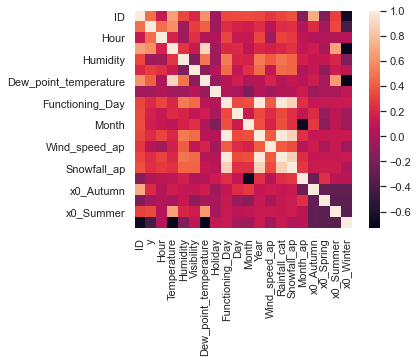

In [94]:
sns.heatmap(df.corr(),square=True)

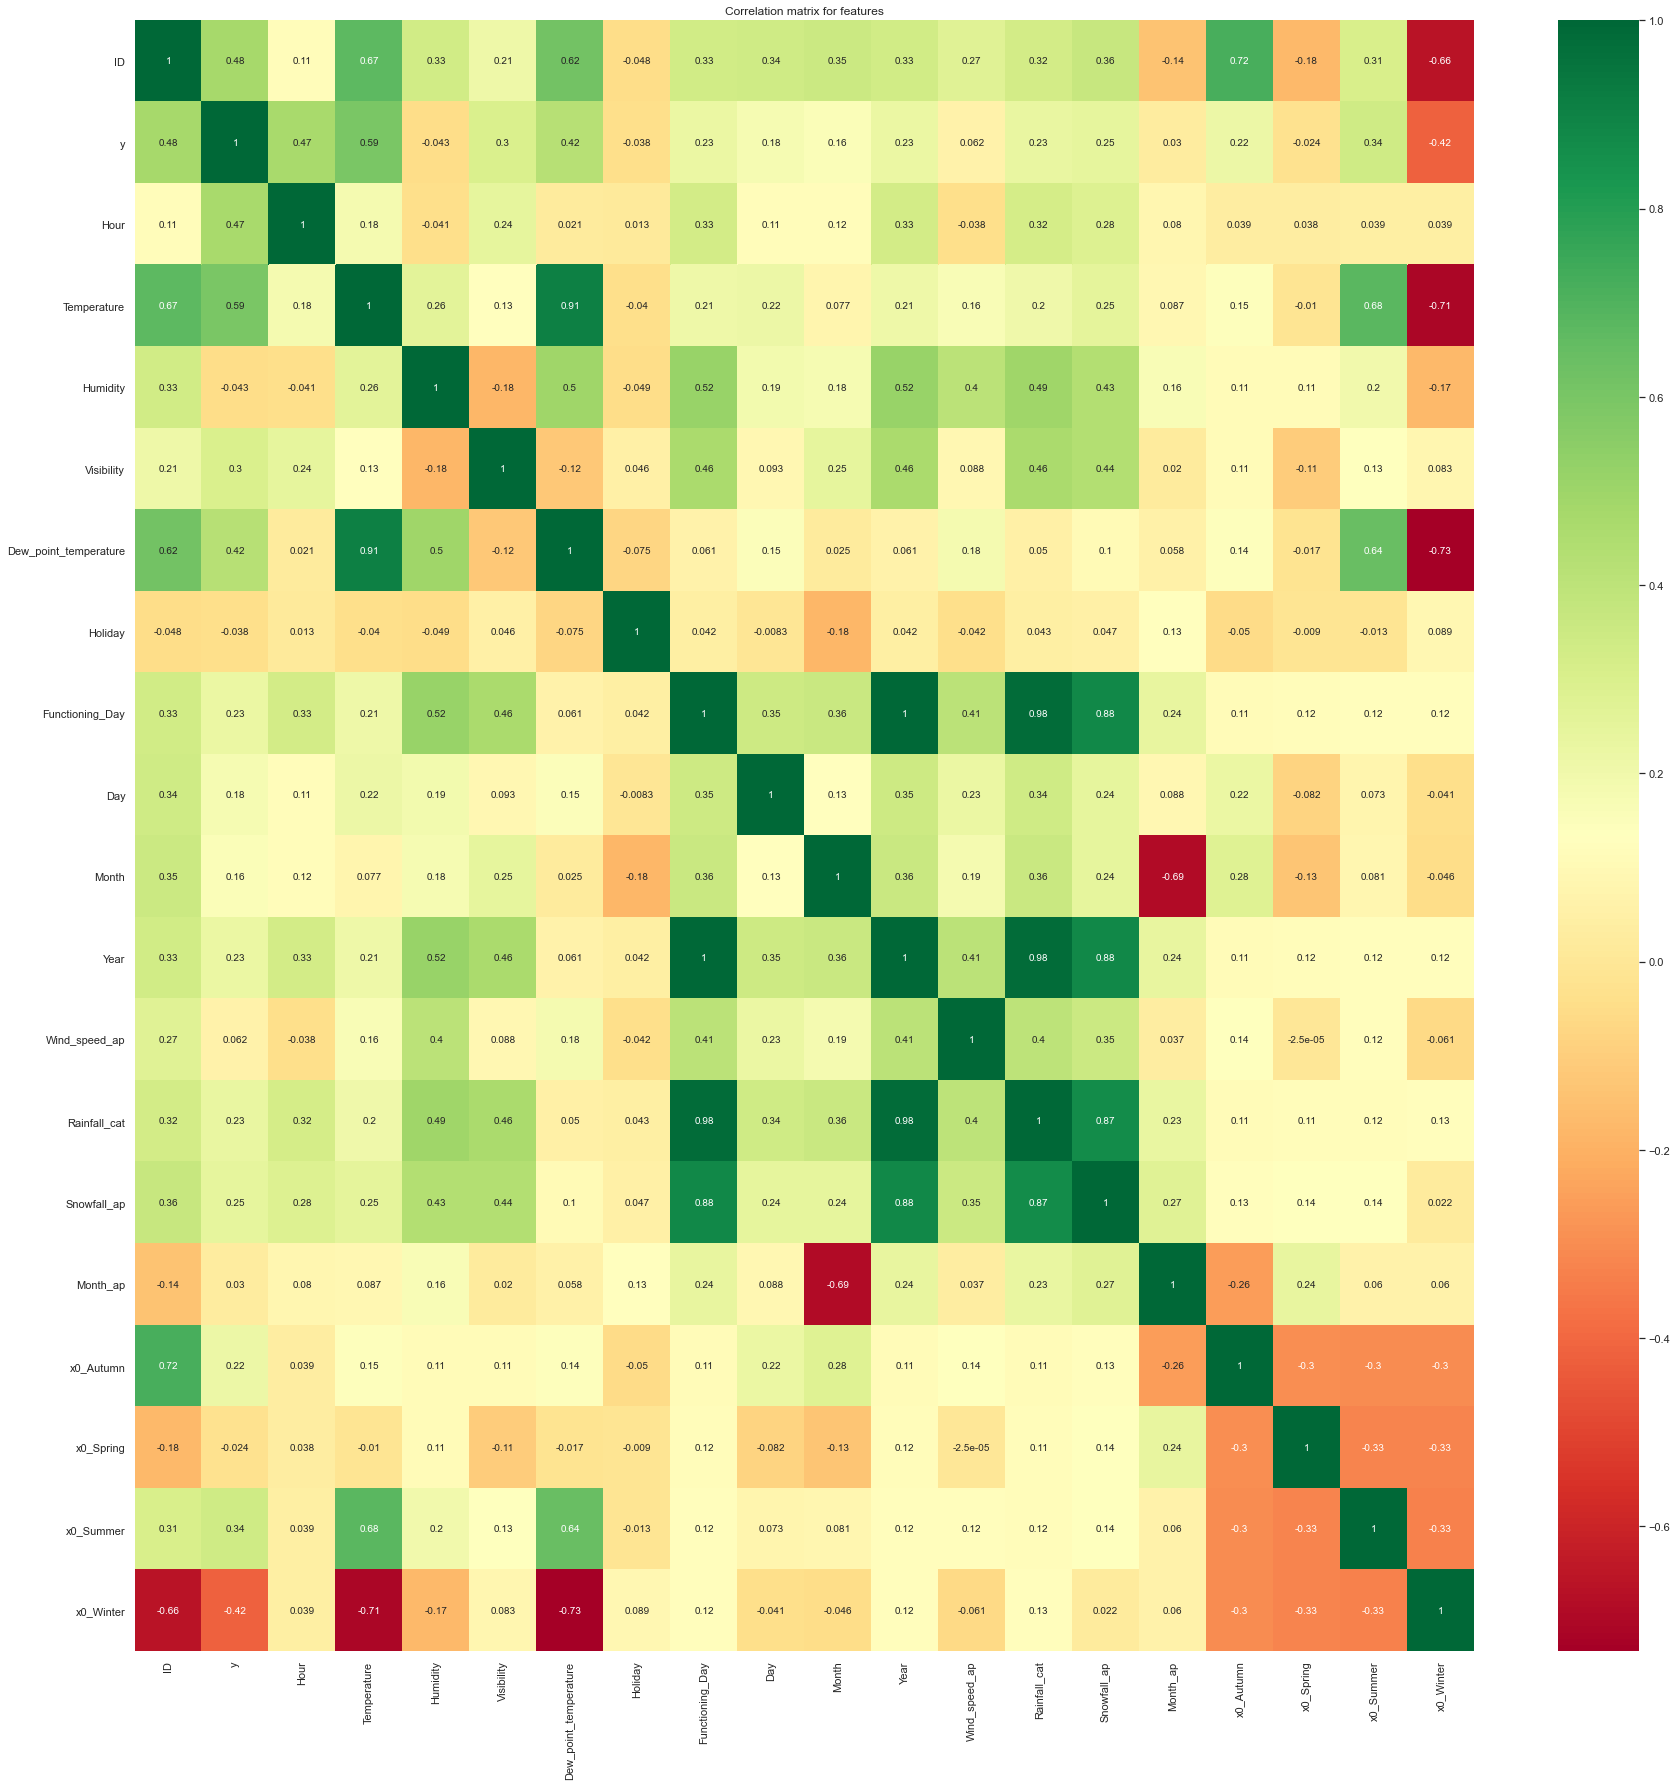

In [95]:
correlation_mat = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix for features")
plt.show()

In [96]:
df.drop(columns=['ID','Date'],inplace=True)

In [97]:
# Make an instance of the Model
pca = PCA()
pca.fit(df) 

X_train_pca = pca.transform(df)

X_train_pca_df = pd.DataFrame(data = X_train_pca,columns=df.columns)

# X_train_pca_df.head()
# X_train_pca_df.shape

# Lambda values (Eigon values)
explained_variance_ratio=pca.explained_variance_ratio_
explained_variance_ratio

# plt.plot(range(21), pca.explained_variance_ratio_)
# plt.plot(range(21), np.cumsum(pca.explained_variance_ratio_)) # Cummualtive frequency graph
# plt.title("Component-wise and Cumulative Explained Variance")

arr=explained_variance_ratio 
sum = 0;  
for i in range(0, 3):    
    sum=sum+arr[i]   
print("Sum :" + str(sum));  

pca = PCA(n_components=3)
pca.fit(df) 

X_train_pca = pca.transform(df)


Sum :0.9994454832552581


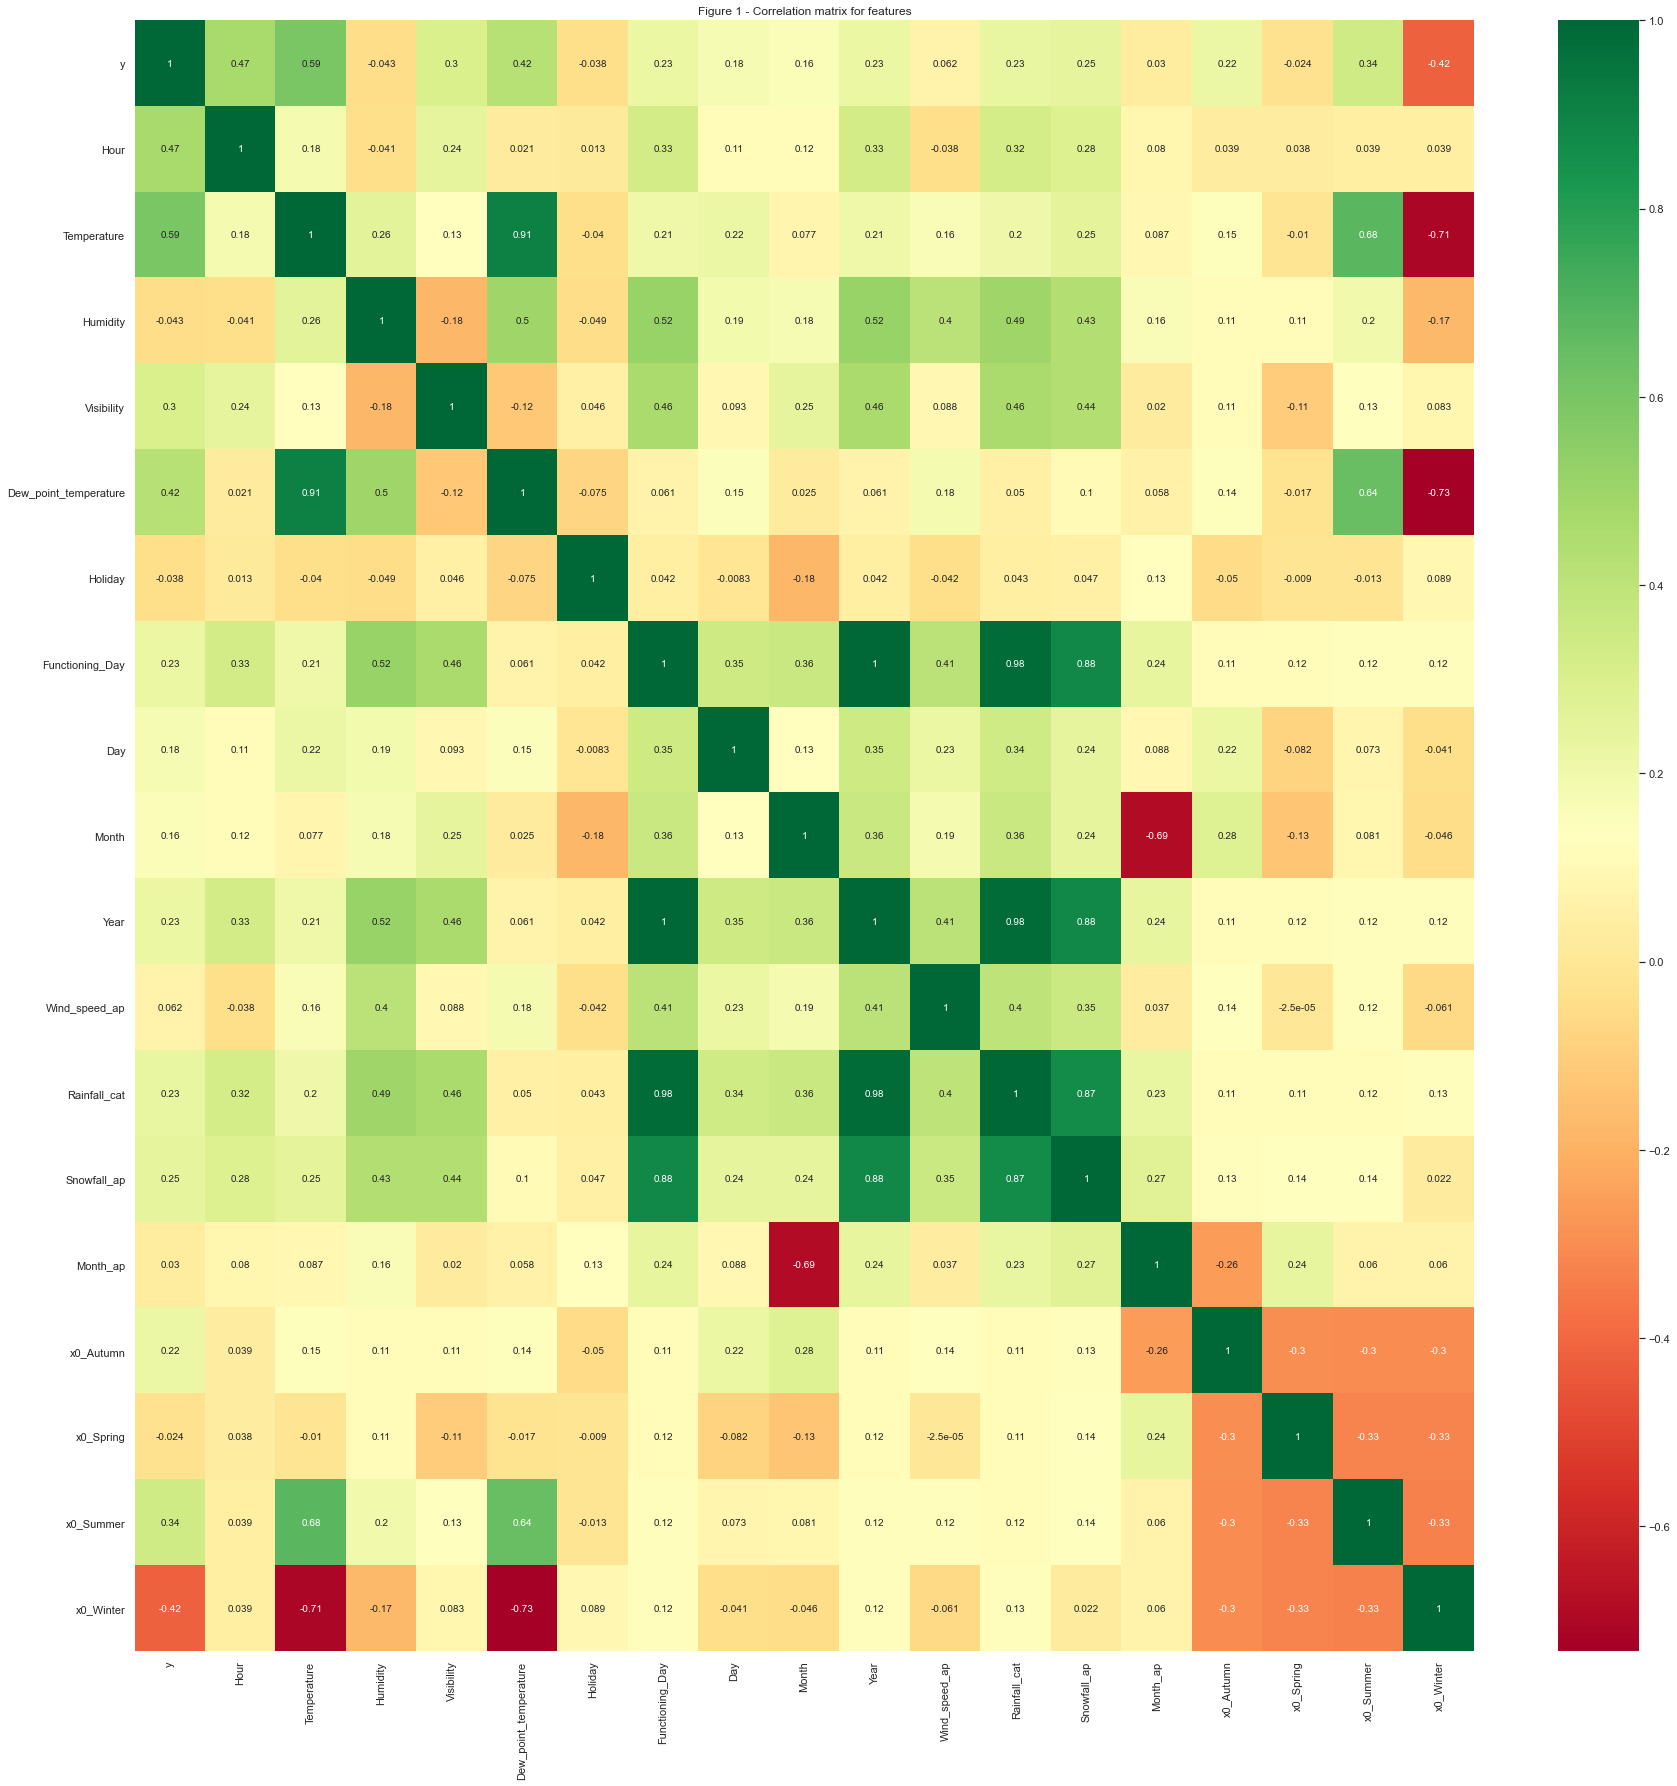

In [98]:
correlation_mat = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Figure 1 - Correlation matrix for features")
plt.show()

In [99]:
features_df= df.drop('y', 1)
target = pd.DataFrame(df['y'], columns=["y"])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val  = train_test_split(features_df,target, test_size=0.2, random_state=42) 

X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)


In [100]:
# xX_train = X_train[['x0_Summer','x0_Autumn','Functioning_Day','Temperature','Humidity','Snowfall','Rainfall',
#                      'Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]


# xX_val = X_val[['x0_Summer','x0_Autumn','Functioning_Day','Temperature','Humidity','Snowfall','Rainfall',
#                     'Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]

In [101]:
# Make an instance of the Model
pca = PCA()
pca.fit(X_train) 

X_train_pca = pca.transform(X_train)

X_train_pca_df = pd.DataFrame(data = X_train_pca,columns=X_train.columns)

# X_train_pca_df.head()
# X_train_pca_df.shape

# Lambda values (Eigon values)
explained_variance_ratio=pca.explained_variance_ratio_
explained_variance_ratio

# plt.plot(range(21), pca.explained_variance_ratio_)
# plt.plot(range(21), np.cumsum(pca.explained_variance_ratio_)) # Cummualtive frequency graph
# plt.title("Component-wise and Cumulative Explained Variance")

arr=explained_variance_ratio 
sum = 0;  
for i in range(0, 3):    
    sum=sum+arr[i]   
print("Sum :" + str(sum));  

pca = PCA(n_components=10)
pca.fit(X_train) 

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

Sum :0.9995457887507303


In [102]:
# Create an instance of the classifier
RFR = RandomForestRegressor(random_state=3)

# Train the classifier
RFR_M = RFR.fit(X_train_pca, y_train)
# print("The accuracy of the classifier on the validation set is ", (RFR.score(xX_val, y_val)))

predictions = np.round(RFR_M.predict(X_val_pca))
y_hat_RFR = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_RFR))

0.5583133444198934

In [103]:
#0.44505500655891717

In [104]:
x

NameError: name 'x' is not defined

In [ ]:
# with outlier and skewed
#['y','Wind_speed', 'Rainfall','Snowfall']

# without outlier 
# ['Hour', 'Temperature', 'Humidity','Visibility', 'Dew_point_temperature', 'Seasons', 
#'Holiday', 'Functioning_Day', 'Day', 'Month','Year']

# skewy
#[''Solar_Radiation'']

# Extract outlier

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=df, orient="h", palette="Set2",ax=ax )

In [ ]:
df.boxplot(column=['Temperature'])

In [ ]:
df.boxplot(column=['Humidity'])

In [ ]:
df.boxplot(column=['Visibility'])

In [ ]:
df.boxplot(column=['Dew_point_temperature'])

In [ ]:
df.boxplot(column=['y'])

In [ ]:
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['y']<3000)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['y'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['y'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
df.boxplot(column=['Wind_speed'])

In [ ]:
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['Wind_speed']<6.5)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Wind_speed'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Wind_speed'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
print(len(df))
UpperLimit = df['Wind_speed'].mean() + df['Wind_speed'].std() * 3
LowerLimit = df['Wind_speed'].mean() - df['Wind_speed'].std() * 3
df2 = df[(df['Wind_speed'] < UpperLimit) & (df['Wind_speed'] > LowerLimit)]
print(len(df2))

# UpperLimit = df['Wind_speed'].quantile(0.95)
# LowerLimit = df['Wind_speed'].quantile(0.05)
# df3 = df[(df['Wind_speed'] < UpperLimit) & (df['Wind_speed'] > LowerLimit)]
# print(len(df3))

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(df['Wind_speed'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Wind_speed'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
df.boxplot(column=['Solar_Radiation'])

In [ ]:
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['Solar_Radiation']<4)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Solar_Radiation'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Solar_Radiation'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
print(len(df))
UpperLimit = df['Solar_Radiation'].mean() + df['Solar_Radiation'].std() * 3
LowerLimit = df['Solar_Radiation'].mean() - df['Solar_Radiation'].std() * 3
df2 = df[(df['Solar_Radiation'] < UpperLimit) & (df['Solar_Radiation'] > LowerLimit)]
print(len(df2))
# UpperLimit = df['Solar_Radiation'].quantile(0.95)
# LowerLimit = df['Solar_Radiation'].quantile(0.05)
# df3 = df[(df['Solar_Radiation'] < UpperLimit) & (df['Solar_Radiation'] > LowerLimit)]
# print(len(df3))

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(df['Solar_Radiation'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Solar_Radiation'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
df.boxplot(column=['Rainfall'])

In [ ]:
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['Rainfall']<10)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Rainfall'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Rainfall'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
print(len(df))
UpperLimit = df['Rainfall'].mean() + df['Rainfall'].std() * .25
LowerLimit = df['Rainfall'].mean() - df['Rainfall'].std() * .25
df2 = df[(df['Rainfall'] < UpperLimit) & (df['Rainfall'] > LowerLimit)]
print(len(df2))
# UpperLimit = df['Rainfall'].quantile(0.95)
# LowerLimit = df['Rainfall'].quantile(0.05)
# df3 = df[(df['Rainfall'] < UpperLimit) & (df['Rainfall'] > LowerLimit)]
# print(len(df3))

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(df['Rainfall'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Rainfall'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
df.boxplot(column=['Snowfall'])

In [ ]:
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['Snowfall']<3)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Snowfall'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Snowfall'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
print(len(df))
UpperLimit = df['Snowfall'].mean() + df['Snowfall'].std() * .25
LowerLimit = df['Snowfall'].mean() - df['Snowfall'].std() * .25
df2 = df[(df['Snowfall'] < UpperLimit) & (df['Snowfall'] > LowerLimit)]
print(len(df2))
# UpperLimit = df['Snowfall'].quantile(0.95)
# LowerLimit = df['Snowfall'].quantile(0.05)
# df3 = df[(df['Snowfall'] < UpperLimit) & (df['Snowfall'] > LowerLimit)]
# print(len(df3))

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(df['Snowfall'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Snowfall'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
fig_dims = (25, 10);
fig, ax = plt.subplots(figsize=fig_dims);
sns.boxplot(data=df, orient="h", palette="Set2",ax=ax );

# Smoothing

In [ ]:
df.columns

In [ ]:
titles = ['y', 'Hour', 'Visibility', 'Holiday', 'Functioning_Day', 'Day', 'Year','Day_of_week',
          'Week_of_year', 'x0_Autumn', 'x0_Spring', 'x0_Summer','x0_Winter', 'x1_Wind_decrease', 
          'x1_Wind_increase', 'x2_Temp_decrease','x2_Temp_increase', 'x3_Rainy', 'x3_lightRain',
          'x3_no_Rain','x4_Snowfall', 'x4_no_Snowfall', 'x5_Hum_decrease', 'x5_Hum_increase',
       'x6_Dew_decrease', 'x6_Dew_increase', 'x7_Month_decrease','x7_Month_increase']
for i in range(len(titles)):
    df.plot(y=[i],kind="line",title=titles[i],figsize=(18, 5)) 
plt.show()

In [ ]:
df_ = df[['Dew_point_temperature','Rainfall', 'Snowfall','Wind_speed','Visibility','Solar_Radiation']]
df_['Dew_point_temperature'] = df['Dew_point_temperature'].rolling(5).mean()
df_['Rainfall'] = df['Rainfall'].rolling(2).min()
df_['Snowfall'] = df['Snowfall'].rolling(7).min()
df_['Wind_speed'] = df['Wind_speed'].rolling(20).mean()
df_['Visibility'] = df['Visibility'].rolling(7).median()
df_['Solar_Radiation'] = df['Solar_Radiation'].rolling(10).median()

t =['Dew_point_temperature','Rainfall', 'Snowfall','Wind_speed','Visibility','Solar_Radiation']

for i in range(len(t)):
    df_.plot(y=[i],kind="line",title=t[i],figsize=(18, 5)) 
plt.show()

for i in range(len(t)):
    df_[t[i]].fillna(df_[t[i]].mean(),inplace=True)

df[t] = df_[t]

In [ ]:
for i in range(len(titles)):
    df.plot(y=[i],kind="line",title=titles[i],figsize=(18, 7)) 
plt.show()

In [ ]:
# from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
# with PdfPages('multipage_pdf.pdf') as pdf:

#     df.plot()
#     pdf.savefig()
#     plt.close()

#     df.plot(kind='bar')
#     pdf.savefig()
#     plt.close()

# Skewed Data

In [ ]:
# Temperature. - df
stats.probplot(df["Temperature"], dist="norm", plot=plt);
plt.show();
df["Temperature"].hist(bins=20);

In [ ]:
## Humidity. - df
stats.probplot(df["Humidity"], dist="norm", plot=plt);
plt.show();
df["Humidity"].hist(bins=20);

In [ ]:
## Wind_speed. - df
stats.probplot(df["Wind_speed"], dist="norm", plot=plt);
plt.show();
df["Wind_speed"].hist(bins=20);

### It is Right skewed. We should apply Logerithem Trassformer to Right Skewed Data

In [ ]:
df['Wind_speed'].min()

###  One Important fact that there contain 0 values. So if we applied logerithem, 0 values will be go into infinite. To avoid that I'm taking the log(x+1) transformation. There are more methods to deal with zero values while performing log transformation of variable like replace 0's with nan or taking square root instead of log transformation. But I prefer this way.

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Wind_speed']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
df['Wind_speed']=df_new['Wind_speed']

In [ ]:
# After transformation
stats.probplot(df["Wind_speed"], dist="norm", plot=plt);
plt.show();
df["Wind_speed"].hist(bins=20);

In [ ]:
## Visibility. - X_train
stats.probplot(df["Visibility"], dist="norm", plot=plt);
plt.show();
df["Visibility"].hist(bins=20);

## It is quite left skewed. So I'll do Exponential trnasformation

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Visibility']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)
df_new['Visibility'].hist(bins=20)

# replace new values with previous data frame
df["Visibility"]=df_new['Visibility']

In [ ]:
stats.probplot(df_new["Visibility"], dist="norm", plot=plt);

In [ ]:
## Dew_point_temperature. - X_train
stats.probplot(df["Dew_point_temperature"], dist="norm", plot=plt);
plt.show();
df["Dew_point_temperature"].hist(bins=20);

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Dew_point_temperature']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)
df_new['Dew_point_temperature'].hist(bins=20)

# replace new values with previous data frame
# df["Dew_point_temperature"]=df_new['Dew_point_temperature']

In [ ]:
stats.probplot(df_new["Dew_point_temperature"], dist="norm", plot=plt);

In [ ]:
df['Solar_Radiation'].min()

In [ ]:
## Solar_Radiation. - X_train
stats.probplot(df["Solar_Radiation"], dist="norm", plot=plt);
plt.show();
df["Solar_Radiation"].hist(bins=20);

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Solar_Radiation']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# df['Solar_Radiation']=df_new['Solar_Radiation']

In [ ]:
# After transformation
stats.probplot(df["Solar_Radiation"], dist="norm", plot=plt);
plt.show();
df["Solar_Radiation"].hist(bins=20);

In [ ]:
## Rainfall. - X_train
stats.probplot(df["Rainfall"], dist="norm", plot=plt);
plt.show();
df["Rainfall"].hist();

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Rainfall']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# df['Rainfall']=df_new['Rainfall']

In [ ]:
# After transformation
stats.probplot(df["Rainfall"], dist="norm", plot=plt);
plt.show();
df["Rainfall"].hist();

In [ ]:
## Snowfall. - X_train
stats.probplot(df["Snowfall"], dist="norm", plot=plt);
plt.show();
df["Snowfall"].hist();

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Snowfall']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# df['Snowfall']=df_new['Snowfall']

In [ ]:
# After transformation
stats.probplot(df["Snowfall"], dist="norm", plot=plt);
plt.show();
df["Snowfall"].hist();

In [ ]:
df.hist(figsize=(16,10));

## left skewed distribution.we need to apply Exponential transformation.
## right skewed distribution.we need to apply log transformation.

In [ ]:
df.describe().loc[['min','max']]

In [ ]:
# Visibility difference large

In [ ]:
to_standardize_df = df[['Hour','Temperature', 'Humidity','Wind_speed','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Day','Month','Year']].copy()
to_standardize_df

In [ ]:
to_standardize_df.hist(figsize=(18,10));

In [ ]:
# create the scaler object
scaler = StandardScaler()

# Same as previous -  we only fit the training data to scaler
scaler.fit(to_standardize_df)

train_scaled = scaler.transform(to_standardize_df)

standardized_df_ = pd.DataFrame(train_scaled, columns = to_standardize_df.columns)

standardized_df_

In [ ]:
standardized_df_.hist(figsize=(18,10));

In [ ]:
df.drop(columns=to_standardize_df.columns,inplace=True, axis=1)

df = standardized_df_.join(df)

In [ ]:
df

Apply K-means discretization

In [ ]:
df_data_disc = pd.DataFrame(df, columns=['Visibility'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(df_data_disc)

df_discretized = discretizer.transform(df_data_disc)

_discretized_df = pd.DataFrame(df_discretized,columns=['Visibility'])

_discretized_df.hist();

In [ ]:
# Append these into previous datframes
df.drop(columns=['Visibility'],inplace=True, axis=1)
df = _discretized_df.join(df)

In [ ]:
features_df= df.drop('y', 1)
target = pd.DataFrame(df['y'], columns=["y"])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val  = train_test_split(features_df,target, test_size=0.2, random_state=42) 

X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)
X_train

# RandomForestClassifier

In [ ]:
xX_train = X_train[['x0_Summer','x0_Autumn','Functioning_Day','Temperature','Humidity','Snowfall','Rainfall',
                    'Func_Aut_Spr','Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]


xX_val = X_val[['x0_Summer','x0_Autumn','Functioning_Day','Temperature','Humidity','Snowfall','Rainfall',
                    'Func_Aut_Spr','Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]

In [ ]:
# Create an instance of the classifier
RFR = RandomForestRegressor(random_state=3)

# Train the classifier
RFR_M = RFR.fit(xX_train, y_train)
# print("The accuracy of the classifier on the validation set is ", (RFR.score(xX_val, y_val)))

predictions = np.round(RFR_M.predict(xX_val))
y_hat_RFR = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_RFR))

In [ ]:
#0.42514823051481343

In [ ]:
#0.42956560318943443

In [ ]:
KNR = KNeighborsRegressor()
KNR_M = KNR.fit(xX_train, y_train)
print("The accuracy of the classifier on the validation set is ", (KNR.score(xX_val, y_val)))

In [ ]:
predictions = np.round(KNR.predict(xX_val))
y_hat_KNR = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_KNR))

In [ ]:
DTR = DecisionTreeRegressor(max_depth=10)
DTR_M = DTR.fit(xX_train, y_train)
print("The accuracy of the classifier on the validation set is ", (DTR.score(xX_val, y_val)))

In [ ]:
predictions = np.round(DTR.predict(xX_val))
y_hat_DTR = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_DTR))

In [ ]:
SVR_ = SVR()
SVR_M = SVR_.fit(xX_train, y_train)
print("The accuracy of the classifier on the validation set is ", (SVR_.score(xX_val, y_val)))

In [ ]:
predictions = np.round(SVR_.predict(xX_val))
y_hat_SVR_ = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_SVR_))

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.plot(y_val, label = "Actual")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(y_hat_DTR, label = "Pred_DTR")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(y_hat_KNR, label = "Pred_KNR")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(y_hat_RFR, label = "Pred_RFR")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(y_hat_SVR_, label = "Pred_SVR")
plt.legend()

# Display a figure.
plt.show()

In [ ]:
test=pd.read_csv('test.csv')
test_df=test.copy()
test_df.info()

In [ ]:
test_df = test_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
test_df['Date']= pd.to_datetime(test_df['Date'])
test_df['Day'] = pd.to_datetime(test_df['Date']).dt.day
test_df['Month'] = pd.to_datetime(test_df['Date']).dt.month
test_df['Year'] = pd.to_datetime(test_df['Date']).dt.year

In [ ]:
test_df.drop(["Date"], inplace=True, axis=1)

In [ ]:
t =['Dew_point_temperature','Rainfall', 'Snowfall','Wind_speed','Visibility','Solar_Radiation']

df_ = test_df[t]

df_['Dew_point_temperature'] = test_df['Dew_point_temperature'].rolling(5).mean()
df_['Rainfall'] = test_df['Rainfall'].rolling(7).mean()
# df_['Snowfall'] = test_df['Snowfall'].rolling(2).min()
df_['Wind_speed'] = test_df['Wind_speed'].rolling(7).mean()
df_['Visibility'] = test_df['Visibility'].rolling(7).max()
df_['Solar_Radiation'] = test_df['Solar_Radiation'].rolling(7).min()

for i in range(len(t)):
    df_[t[i]].fillna(df_[t[i]].mean(),inplace=True)
# df_['Wind_speed'].fillna(df_['Wind_speed'].mean(),inplace=True)
# df_['Visibility'].fillna(df_['Visibility'].max(),inplace=True)
# df_['Solar_Radiation'].fillna(df_['Solar_Radiation'].min(),inplace=True)

In [ ]:
test_df[t] = df_[t]

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Wind_speed']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
test_df['Wind_speed']=df_new['Wind_speed']

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Visibility']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)
# df_new['Visibility'].hist()

# replace new values with previous data frame
test_df["Visibility"]=df_new['Visibility']

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Dew_point_temperature']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)
# df_new['Visibility'].hist()

# replace new values with previous data frame
# test_df["Dew_point_temperature"]=df_new['Dew_point_temperature']

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Solar_Radiation']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# test_df['Solar_Radiation']=df_new['Solar_Radiation']

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Rainfall']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# test_df['Rainfall']=df_new['Rainfall']

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Snowfall']

# create the function transformer object with logarithm transformation
logarithm_transformer1 = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer1.transform(test_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
# test_df['Snowfall']=df_new['Snowfall']

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# We fitting only training data
enc.fit(test_df[['Seasons']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(test_df[['Seasons']]).toarray(),columns=colnames)
test_df = test_df.join(enc_df)

In [ ]:
test_df.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)
test_df.Holiday.replace(to_replace=["Holiday","No Holiday"], value =[1,0], inplace = True)

In [ ]:
test_df.drop('Seasons', inplace=True, axis=1)


In [ ]:
test_df.set_index('ID',inplace=True)

In [ ]:
test_df[test_df['Functioning_Day']==0] = 0

In [ ]:
to_standardize_df = test_df[['Hour','Temperature', 'Humidity','Wind_speed','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Day','Month','Year']].copy()
to_standardize_df

In [ ]:
# create the scaler object
scaler = StandardScaler()

# Same as previous -  we only fit the training data to scaler
scaler.fit(to_standardize_df)

train_scaled = scaler.transform(to_standardize_df)

standardized_df_ = pd.DataFrame(train_scaled, columns = to_standardize_df.columns)

standardized_df_

In [ ]:
test_df

In [ ]:
test_df.drop(columns=to_standardize_df.columns,inplace=True, axis=1)

In [ ]:
test_df

In [ ]:
testx = test_df.join(standardized_df_,how='left',on='ID')

In [ ]:
testx

In [ ]:
df_data_disc = pd.DataFrame(test_df, columns=['Visibility'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(df_data_disc)

df_discretized = discretizer.transform(df_data_disc)

_discretized_df = pd.DataFrame(df_discretized,columns=['Visibility'])


In [ ]:
# Append these into previous datframes
test_df.drop(columns=['Visibility'],inplace=True, axis=1)
test_df = _discretized_df.join(test_df)


In [ ]:
# X_test = test_df.drop(columns=['ID'])
X_test = test_df
# You should update/remove the next line once you change the features used for training
X_test = X_test[['x0_Summer','x0_Autumn','Functioning_Day','Temperature','Humidity','Snowfall','Rainfall',
                    'Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]

# Create an instance of the classifier

# Train the classifier
y_test_predicted = RFR.predict(X_test)

test_df['y'] = np.round(y_test_predicted)

test_df.head()

In [ ]:
test_df.reset_index(inplace=True)

In [ ]:
test_df.head()

In [ ]:
test_df[['level_0', 'y']].to_csv('submission.csv', index=False)

In [ ]:
# y_hat_SVR_ #.3
# y_hat_RFR #1.3
# y_hat_KNR #1.2
# y_hat_DTR #1.5

In [ ]:
r2_score(np.random.choice(y_test_predicted,1044),y_hat_RFR)

In [ ]:
np.sqrt(mean_squared_log_error(np.random.choice(y_test_predicted,1044),y_hat_RFR))

In [ ]:
3000 - 2542